# 1)Problem Statement

A **credit score** is a numerical representation of an individual's creditworthiness, typically ranging from 300 to 850. It helps lenders assess the risk of lending money to individuals. Higher credit scores indicate better creditworthiness, meaning the individual is more likely to repay loans on time, while lower scores indicate higher risk.

### Key Factors That Determine a Credit Score:
1. **Payment History (35%)**:
   - This is the most significant factor. It includes whether you’ve paid past credit accounts on time. Late payments, defaults, bankruptcies, and foreclosures negatively impact your score.

2. **Credit Utilization (30%)**:
   - This is the ratio of current credit card balances to the total credit limit. It’s recommended to keep credit utilization below 30%. For example, if your total credit limit is $10,000 and your balance is $3,000, your utilization rate is 30%.

3. **Length of Credit History (15%)**:
   - The longer your credit history, the better. This includes the age of your oldest account, the average age of all accounts, and how long it’s been since you used certain accounts.

4. **Credit Mix (10%)**:
   - Having a variety of credit types (e.g., credit cards, mortgages, auto loans) can help your score. It shows you can manage different types of debt.

5. **New Credit (10%)**:
   - Opening several new credit accounts in a short period can negatively impact your score. Each time you apply for credit, a hard inquiry is made, which can lower your score temporarily.





**Credit risk model building** is the process of developing statistical or machine learning models to assess the likelihood that a borrower or customer will default on their financial obligations. These models are essential in banking, lending, and financial services as they help institutions quantify the level of risk associated with granting loans or credit to customers. A critical model within this domain is the **Probability of Default (PD) model**, which estimates the likelihood that a borrower will default on a loan within a specific timeframe, often one year.


#2)Data Exploration, Validation, Cleaning

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Import Give me some Credit\cs-training.csv

In [2]:
loans=pd.read_csv("data/cs-training.csv")

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Sr_No                                 150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   monthly_utilization                   150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [4]:
#What are number of rows and columns
loans.shape

(150000, 12)

In [5]:
#Are there any suspicious variables?
loans.columns.values

array(['Sr_No', 'SeriousDlqin2yrs', 'monthly_utilization', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype=object)

In [6]:
#Display the variable formats
loans.dtypes

Sr_No                                     int64
SeriousDlqin2yrs                          int64
monthly_utilization                     float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [7]:
#Print the first 10 observations
loans.head(10)

,Sr_No,SeriousDlqin2yrs,monthly_utilization,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [17]:
#Do we have any unique identifier?
loans.columns.values

array(['Sr_No', 'SeriousDlqin2yrs', 'monthly_utilization', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype=object)

## Categorical variables exploration

In [8]:
#What are the categorical and discrete variables? What are the continues variables.
loans.dtypes
loans.head()


,Sr_No,SeriousDlqin2yrs,monthly_utilization,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [18]:
#for discrette variables count the frequency and see for outliers null values , 
# out liers can be calculated talking to  the business partner

print(loans['SeriousDlqin2yrs'].value_counts())

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64


In [10]:
print(loans['age'].value_counts())

49     3837
48     3806
50     3753
47     3719
63     3719
       ... 
102       3
109       2
107       1
105       1
0         1
Name: age, Length: 86, dtype: int64


In [11]:
print(loans['NumberOfTime30-59DaysPastDueNotWorse'].value_counts())

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64


In [12]:
print(loans['NumberOfOpenCreditLinesAndLoans'].value_counts())

6     13614
7     13245
5     12931
8     12562
4     11609
9     11355
10     9624
3      9058
11     8321
12     7005
2      6666
13     5667
14     4546
1      4438
15     3645
16     3000
17     2370
0      1888
18     1874
19     1433
20     1169
21      864
22      685
23      533
24      422
25      337
26      239
27      194
28      150
29      114
30       88
31       74
32       52
33       47
34       35
35       27
36       18
38       13
40       10
39        9
42        8
45        8
43        8
37        7
48        6
49        4
54        4
41        4
52        3
46        3
57        2
51        2
56        2
47        2
50        2
44        2
58        1
53        1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64


In [13]:
print(loans['NumberOfTimes90DaysLate'].value_counts())

0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
96         5
11         5
13         4
15         2
14         2
12         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64


In [14]:
print(loans['NumberRealEstateLoansOrLines'].value_counts())

0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
15        7
14        7
17        4
16        4
25        3
18        2
23        2
19        2
20        2
26        1
54        1
21        1
29        1
32        1
Name: NumberRealEstateLoansOrLines, dtype: int64


In [15]:
print(loans['NumberOfTime60-89DaysPastDueNotWorse'].value_counts())

0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64


In [16]:
print(loans['NumberOfDependents'].value_counts())

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: NumberOfDependents, dtype: int64


In [20]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Sr_No                                 150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   monthly_utilization                   150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [21]:
#Are there any   variables with missing values? MonthlyIncome  NumberOfDependents                               
loans.isnull().sum()

Sr_No                                       0
SeriousDlqin2yrs                            0
monthly_utilization                         0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

## Continuous variables exploration

In [22]:
loans.head(5)

,Sr_No,SeriousDlqin2yrs,monthly_utilization,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### RevolvingUtilizationOfUnsecuredLines

{'whiskers': [<matplotlib.lines.Line2D at 0x24560df9410>,
 'caps': [<matplotlib.lines.Line2D at 0x24560dfaa50>,
 'boxes': [<matplotlib.lines.Line2D at 0x24560df8710>],
 'medians': [<matplotlib.lines.Line2D at 0x24560dfbe50>],
 'fliers': [<matplotlib.lines.Line2D at 0x24560e00790>],
 'means': []}

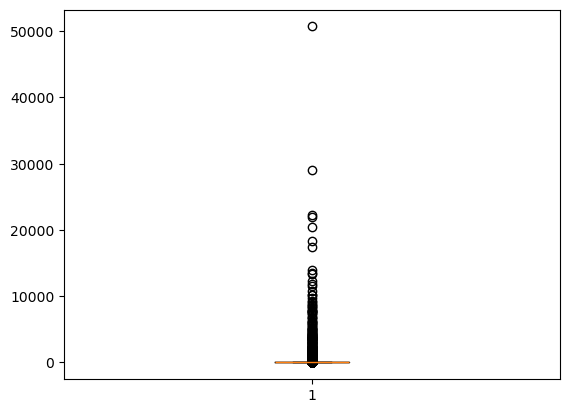

In [23]:
plt.boxplot(loans["monthly_utilization"])

In [24]:
util_percentiles=loans['monthly_utilization'].quantile([0, 0.1, 0.2,0.3,0.4, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(util_percentiles,2)

0.000        0.00
0.100        0.00
0.200        0.02
0.300        0.04
0.400        0.08
0.500        0.15
0.750        0.56
0.800        0.70
0.900        0.98
0.910        1.00
0.950        1.00
0.960        1.00
0.970        1.00
0.975        1.00
0.980        1.01
0.990        1.09
1.000    50708.00
Name: monthly_utilization, dtype: float64

### MonthlyIncome

{'whiskers': [<matplotlib.lines.Line2D at 0x245609925d0>,
 'caps': [<matplotlib.lines.Line2D at 0x245609a8e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x24560996c90>],
 'medians': [<matplotlib.lines.Line2D at 0x245609aa410>],
 'fliers': [<matplotlib.lines.Line2D at 0x245609aae90>],
 'means': []}

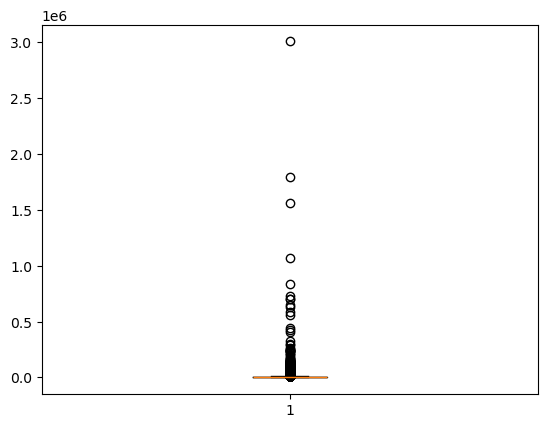

In [25]:
#loans.boxplot(column="MonthlyIncome")
non_null_monthly_income=loans["MonthlyIncome"][loans["MonthlyIncome"].isnull()==False]
plt.boxplot(non_null_monthly_income)

In [28]:
loans.shape

(150000, 12)

In [29]:
#Find the percentage of missing values
print("Count of missing values")
print(loans['MonthlyIncome'].isnull().sum())
print("% of missing values")
print(round(loans['MonthlyIncome'].isnull().sum()/len(loans),2)*100)

Count of missing values
29731
% of missing values
20.0


## Data Cleaning

### Data Cleaning - Monthly_utilization

In [30]:
util_percentiles=loans['monthly_utilization'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(util_percentiles,2)

0.050        0.00
0.100        0.00
0.250        0.03
0.500        0.15
0.750        0.56
0.800        0.70
0.900        0.98
0.910        1.00
0.950        1.00
0.960        1.00
0.970        1.00
0.975        1.00
0.980        1.01
0.990        1.09
1.000    50708.00
Name: monthly_utilization, dtype: float64

In [31]:
median_util=loans['monthly_utilization'].median()
median_util

0.154180737

In [32]:
util_temp_bool_vect=loans['monthly_utilization']>1

loans['util_new']=loans['monthly_utilization']
loans['util_new'][util_temp_bool_vect]=median_util

C:\Users\WIN-10\AppData\Local\Temp\ipykernel_8516\953468620.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans['util_new'][util_temp_bool_vect]=median_util


In [33]:
# percentile distribution for new variable
util_percentiles1=loans['util_new'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(util_percentiles1,2)


0.050    0.00
0.100    0.00
0.250    0.03
0.500    0.15
0.750    0.51
0.800    0.63
0.900    0.93
0.910    0.95
0.950    1.00
0.960    1.00
0.970    1.00
0.975    1.00
0.980    1.00
0.990    1.00
1.000    1.00
Name: util_new, dtype: float64

### Data Cleaning - NumberOfTime30-59DaysPastDueNotWorse

In [35]:
freq_table_30dpd=loans['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()
freq_table_30dpd

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [37]:
#A contingency table helps us understand the relationship between two or more categorical variables within a dataset.


# sample DataFrame
data = {'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
        'Smoker': ['Yes', 'No', 'Yes', 'No', 'No']}

df = pd.DataFrame(data)

# create a cross-tabulation of Gender and Smoker
cross_tab = pd.crosstab(df['Gender'], df['Smoker'])

print(cross_tab)

Smoker  No  Yes
Gender         
Female   2    0
Male     1    2


In [41]:
cross_tab.apply(lambda x: x/x.sum(), axis=0)

Smoker,No,Yes
Gender,,
Female,0.666667,0.0
Male,0.333333,1.0


In [43]:
cross_tab.apply(lambda x: x/x.sum(), axis=1)

Smoker,No,Yes
Gender,,
Female,1.000000,0.000000
Male,0.333333,0.666667


In [36]:
#Clean the variable- Look at the cross tab of variable vs target. Impute based on target .
#Cross tab with target
import pandas as pd
cross_tab_30dpd_target=pd.crosstab(loans['NumberOfTime30-59DaysPastDueNotWorse'],loans['SeriousDlqin2yrs'])
cross_tab_30dpd_target

SeriousDlqin2yrs,0,1
NumberOfTime30-59DaysPastDueNotWorse,,
0,120977,5041
1,13624,2409
2,3379,1219
3,1136,618
4,429,318
5,188,154
6,66,74
7,26,28
8,17,8


In [38]:
#Cross tab row Percentages
cross_tab_30dpd_target_percent=cross_tab_30dpd_target.apply(lambda x: x/x.sum(), axis=1)
round(cross_tab_30dpd_target_percent,2)

SeriousDlqin2yrs,0,1
NumberOfTime30-59DaysPastDueNotWorse,,
0,0.96,0.04
1,0.85,0.15
2,0.73,0.27
3,0.65,0.35
4,0.57,0.43
5,0.55,0.45
6,0.47,0.53
7,0.48,0.52
8,0.68,0.32


In [44]:

#Percentage of 0 and 1 are of 98 is near to percentages of 6.
#Replacing error values with 6

loans['num_30_59_dpd_new']=loans['NumberOfTime30-59DaysPastDueNotWorse']
loans['num_30_59_dpd_new'][loans['num_30_59_dpd_new']>13]=6
loans['num_30_59_dpd_new']

loans['num_30_59_dpd_new'].value_counts()

C:\Users\WIN-10\AppData\Local\Temp\ipykernel_8516\3992811056.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans['num_30_59_dpd_new'][loans['num_30_59_dpd_new']>13]=6


0     126018
1      16033
2       4598
3       1754
4        747
6        409
5        342
7         54
8         25
9         12
10         4
12         2
13         1
11         1
Name: num_30_59_dpd_new, dtype: int64

### Data Cleaning Monthly Income

In [60]:
#Find the missing value percentage in monthly income
loans['MonthlyIncome'].isnull().sum()
loans['MonthlyIncome'].isnull().sum()/len(loans)
#Once identified where missing values exist, the next task usually is to fill them (data imputation). Depending upon the context,
#in this case, I am assigning median value to all those positions where missing value is present:


0.19820666666666667

In [61]:
#Flag variable
loans['MonthlyIncome_ind']=1
loans['MonthlyIncome_ind'][loans['MonthlyIncome'].isnull()]=0
loans['MonthlyIncome_ind'].value_counts()


C:\Users\WIN-10\AppData\Local\Temp\ipykernel_8516\3547523868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans['MonthlyIncome_ind'][loans['MonthlyIncome'].isnull()]=0


1    120269
0     29731
Name: MonthlyIncome_ind, dtype: int64

In [48]:
#Imputation with median
loans['MonthlyIncome_new']=loans['MonthlyIncome']
loans['MonthlyIncome_new'][loans['MonthlyIncome'].isnull()]=loans['MonthlyIncome'].median()
round(loans['MonthlyIncome_new'].describe())

C:\Users\WIN-10\AppData\Local\Temp\ipykernel_8516\3855414345.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans['MonthlyIncome_new'][loans['MonthlyIncome'].isnull()]=loans['MonthlyIncome'].median()


count     150000.0
mean        6418.0
std        12890.0
min            0.0
25%         3903.0
50%         5400.0
75%         7400.0
max      3008750.0
Name: MonthlyIncome_new, dtype: float64

#Data Cleaning - All the other Variables

In [49]:
loans.columns

Index(['Sr_No', 'SeriousDlqin2yrs', 'monthly_utilization', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'util_new', 'num_30_59_dpd_new',
       'MonthlyIncome_ind', 'MonthlyIncome_new'],
      dtype='object')

### Age

In [50]:
loans["age"].quantile([0, 0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.90,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.00      0.0
0.01     24.0
0.10     33.0
0.20     39.0
0.30     44.0
0.40     48.0
0.50     52.0
0.60     56.0
0.70     61.0
0.80     65.0
0.90     72.0
0.93     75.0
0.94     76.0
0.95     78.0
0.96     79.0
0.97     81.0
0.98     84.0
0.99     87.0
1.00    109.0
Name: age, dtype: float64

In [52]:
loans["age_new"]=loans["age"]
loans["age_new"][loans["age_new"]>90]=loans["age"].median()

C:\Users\WIN-10\AppData\Local\Temp\ipykernel_8516\2899766376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans["age_new"][loans["age_new"]>90]=loans["age"].median()


### DebtRatio

In [53]:
loans["DebtRatio"].quantile([0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.75,0.76,0.77, 0.78,0.8,0.81,0.82, 0.83,0.86,0.90,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.00         0.000000
0.01         0.000000
0.02         0.000000
0.03         0.000480
0.04         0.002278
0.05         0.004329
0.06         0.006799
0.07         0.009997
0.08         0.014780
0.09         0.021249
0.10         0.030874
0.20         0.133773
0.30         0.213697
0.40         0.287460
0.50         0.366508
0.60         0.467506
0.70         0.649189
0.75         0.868254
0.76         0.951184
0.77         1.058832
0.78         1.275069
0.80         4.000000
0.81        14.000000
0.82        31.000000
0.83        61.000000
0.86       453.000000
0.90      1267.000000
0.93      1917.070000
0.94      2172.060000
0.95      2449.000000
0.96      2791.000000
0.97      3225.000000
0.98      3839.000000
0.99      4979.040000
1.00    329664.000000
Name: DebtRatio, dtype: float64

In [54]:
loans["DebtRatio"].isnull().sum()

0

In [55]:
#24% outliers
#No missing values

In [56]:
loans["DebtRatio_new"]=loans["DebtRatio"]
loans["DebtRatio_new"][loans["DebtRatio_new"]>1]=loans["DebtRatio"].median()

C:\Users\WIN-10\AppData\Local\Temp\ipykernel_8516\1006539189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans["DebtRatio_new"][loans["DebtRatio_new"]>1]=loans["DebtRatio"].median()


In [57]:
loans["DebtRatio_new"].describe()

count    150000.000000
mean          0.317893
std           0.199835
min           0.000000
25%           0.175074
50%           0.366506
75%           0.380021
max           1.000000
Name: DebtRatio_new, dtype: float64

### NumberOfOpenCreditLinesAndLoans

In [58]:
loans["NumberOfOpenCreditLinesAndLoans"].value_counts(sort=False)

13     5667
4     11609
2      6666
5     12931
7     13245
3      9058
8     12562
9     11355
6     13614
10     9624
14     4546
22      685
17     2370
1      4438
15     3645
31       74
12     7005
21      864
11     8321
19     1433
18     1874
26      239
20     1169
23      533
0      1888
16     3000
27      194
29      114
28      150
24      422
25      337
32       52
46        3
33       47
30       88
34       35
37        7
38       13
36       18
35       27
54        4
43        8
45        8
49        4
57        2
48        6
40       10
58        1
51        2
52        3
39        9
41        4
56        2
42        8
47        2
50        2
44        2
53        1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

In [59]:
loans["NumberOfOpenCreditLinesAndLoans"].quantile([0, 0.1, 0.2,0.3,0.4, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])

0.000     0.0
0.100     3.0
0.200     4.0
0.300     5.0
0.400     6.0
0.500     8.0
0.750    11.0
0.800    12.0
0.900    15.0
0.910    16.0
0.950    18.0
0.960    19.0
0.970    20.0
0.975    21.0
0.980    22.0
0.990    24.0
1.000    58.0
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

In [ ]:
#3% High side outliers
#No Missing values

In [ ]:
loans["Open_Credit_lines_new"]=loans["NumberOfOpenCreditLinesAndLoans"]
loans["Open_Credit_lines_new"][loans["Open_Credit_lines_new"]>20]=loans["NumberOfOpenCreditLinesAndLoans"].median()
loans.info()

## NumberOfTimes90DaysLate

In [ ]:
cross_tab_90dpd_target=pd.crosstab(loans['NumberOfTimes90DaysLate'],loans['SeriousDlqin2yrs'])
cross_tab_90dpd_target

In [ ]:
cross_tab_90dpd_target_percent=cross_tab_90dpd_target.astype(float).div(cross_tab_90dpd_target.sum(axis=1), axis=0)
round(cross_tab_90dpd_target_percent,2)

In [ ]:
loans['num_90_dpd_new']=loans['NumberOfTimes90DaysLate']
loans['num_90_dpd_new'][loans['num_90_dpd_new']>12]=3
loans['num_90_dpd_new']

loans['num_90_dpd_new'].value_counts(sort=False)

### NumberRealEstateLoansOrLines

In [ ]:
loans["NumberRealEstateLoansOrLines"].quantile([0, 0.1, 0.2,0.3,0.4, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])

In [ ]:
loans["Real_estate_loans_new"]=loans["NumberRealEstateLoansOrLines"]
loans["Real_estate_loans_new"][loans["Real_estate_loans_new"]>4]=loans["NumberRealEstateLoansOrLines"].median()

## NumberOfTime60-89DaysPastDueNotWorse

In [ ]:
loans['num_60_dpd_new']=loans['NumberOfTime60-89DaysPastDueNotWorse']
loans['num_60_dpd_new'][loans['num_60_dpd_new']>12]=3
loans['num_60_dpd_new']

loans['num_60_dpd_new'].value_counts(sort=False)

## NumberOfDependents

In [ ]:
loans["NumberOfDependents"].value_counts()

In [ ]:
loans["NumberOfDependents"].isnull().sum()

In [ ]:
loans["NumberOfDependents_new"]=loans["NumberOfDependents"]
loans["NumberOfDependents_new"][(loans["NumberOfDependents_new"]>10)|
                                (loans["NumberOfDependents"].isnull())]=loans["NumberOfDependents"].median()

In [ ]:
loans["NumberOfDependents_new"].isnull().sum()

In [ ]:
loans["NumberOfDependents_new"].value_counts()

## Exporting the final dataset

In [ ]:
loans.to_csv("loans_cleaned.csv")

## Importing Already Cleaned Dataset

In [ ]:
loans=pd.read_csv("data/Cleaned_cs_training.csv")

In [ ]:
loans.describe()

# 3)Logistic Regression Model Building

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from sklearn.model_selection import train_test_split

X=loans.drop(["SeriousDlqin2yrs","Sr_No"],axis=1)
y=loans["SeriousDlqin2yrs"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

In [ ]:
model=sm.Logit(y_train,X_train).fit()
print(model.summary())

In [ ]:
#Accuracy
pred_train=model.predict(X_train)
pred_test=model.predict(X_test)

#Confuson matrix and Accuracy on train data
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_train,np.round(pred_train))
acc=accuracy_score(y_train,np.round(pred_train))
print("Train Accuracy", acc)

#Confuson matrix and Accuracy on test data
confusion_matrix(y_test,np.round(pred_test))
acc=accuracy_score(y_test,np.round(pred_test))
print("Test Accuracy", acc)

#Multicollinearity Checking

In [ ]:
#Vif Function
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [ ]:
vif_cal(loans.drop(["Sr_No"],axis=1),"SeriousDlqin2yrs")

#Final Model

In [ ]:
#Drop DebtRatio_new based on the P-Value

X=loans.drop(["SeriousDlqin2yrs","Sr_No","DebtRatio_new"],axis=1)
y=loans["SeriousDlqin2yrs"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

import statsmodels.api as sm
model=sm.Logit(y_train,X_train).fit()
print(model.summary())

tran_pred=model.predict(X_train)
test_pred=model.predict(X_test)


train_accuracy=accuracy_score(y_train,np.round(tran_pred))
test_accuracy=accuracy_score(y_test,np.round(test_pred))


print("Train Accuracy", train_accuracy)
print("Test Accuracy", test_accuracy)


# 4)Model Validation & Class Imbalance

In [ ]:
#Classwise Accuracy
loans["SeriousDlqin2yrs"].value_counts()/len(loans)

In [ ]:
train_cm=confusion_matrix(y_train,np.round(tran_pred))
test_cm=confusion_matrix(y_test,np.round(test_pred))

print("Train Confusion Matrix\n", train_cm)
print("Test Confusion Matrix\n", test_cm)


In [ ]:
#Class-0 and Class-1 Accuracy
class_0_acc=train_cm[0,0]/(train_cm[0,0]+train_cm[0,1])
class_1_acc=train_cm[1,1]/(train_cm[1,0]+train_cm[1,1])

print("Class-0 Accuracy", class_0_acc)
print("Class-1 Accuracy", class_1_acc)

#Handling Class Imablance using SMOTE technique

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy=0.6, random_state=44)

X_train_smote, y_train_smote=smote.fit_resample(X_train,y_train)

import collections
print("Before SMOTE", collections.Counter(y_train))
print("After SMOTE", collections.Counter(y_train_smote))

##Model with balanced data - SMOTE

In [ ]:
model=sm.Logit(y_train_smote,X_train_smote).fit()
print(model.summary())

In [ ]:
#Confusion matrix and Accuracy
tran_pred=model.predict(X_train_smote)
test_pred=model.predict(X_test)

#confusion matrix
train_cm=confusion_matrix(y_train_smote,np.round(tran_pred))
test_cm=confusion_matrix(y_test,np.round(test_pred))

print("Train Confusion Matrix\n", train_cm)
print("Test Confusion Matrix\n", test_cm)


In [ ]:
#Class-0 and Class-1 Accuracy
class_0_acc=train_cm[0,0]/(train_cm[0,0]+train_cm[0,1])
class_1_acc=train_cm[1,1]/(train_cm[1,0]+train_cm[1,1])

print("Class-0 Accuracy", class_0_acc)
print("Class-1 Accuracy", class_1_acc)

In [ ]:
#Class-0 and Class-1 Accuracy on test data
class_0_acc=test_cm[0,0]/(test_cm[0,0]+test_cm[0,1])
class_1_acc=test_cm[1,1]/(test_cm[1,0]+test_cm[1,1])

print("Class-0 Accuracy", class_0_acc)
print("Class-1 Accuracy", class_1_acc)